In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
car = pd.read_csv(path)
car.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

How could Highway-mpg help us predict car price?
For this example, we want to look at how highway-mpg can help us predict car price. 
Using simple linear regression, we will create a linear function with "highway-mpg" 
as the predictor variable and the "price" as the response variable.

In [5]:
X = car[['highway-mpg']]
Y = car['price']

Fit the linear model using highway-mpg.

In [6]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
#What is the value of the intercept (a)?
lm.intercept_

38423.305858157386

In [9]:
#What is the value of the Slope (b)?
lm.coef_

array([-821.73337832])

What is the final estimated linear model we get?
| 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 |
| price = 38423.31 - 821.73 x highway-mpg |

In [10]:
#Q1 a) Create a linear regression object
lm1 = LinearRegression()

In [11]:
#Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?
X = car[['engine-size']]
Y = car['price']
lm1.fit(X,Y)

LinearRegression()

In [12]:
Yhat=lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [13]:
lm1.intercept_

-7963.338906281049

In [14]:
lm1.coef_

array([166.86001569])

Multiple Linear Regression : | 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4 |

From the previous section we know that other good predictors of price could be:

Horsepower,
Curb-weight,
Engine-size,
Highway-mpg.
Let's develop a model using these variables as the predictor variables.

In [15]:
X = car[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = car['price']
lm.fit(X,Y)

LinearRegression()

In [16]:
lm.intercept_

-15806.624626329198

In [17]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.

In [18]:
X = car[['normalized-losses','highway-mpg']]
Y = car['price']
lm.fit(X,Y)

LinearRegression()

In [19]:
lm.coef_

array([   1.49789586, -820.45434016])

2) Model Evaluation using Visualization

In [20]:
import seaborn as sns
%matplotlib inline

Regression Plot

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48185.163403605475)

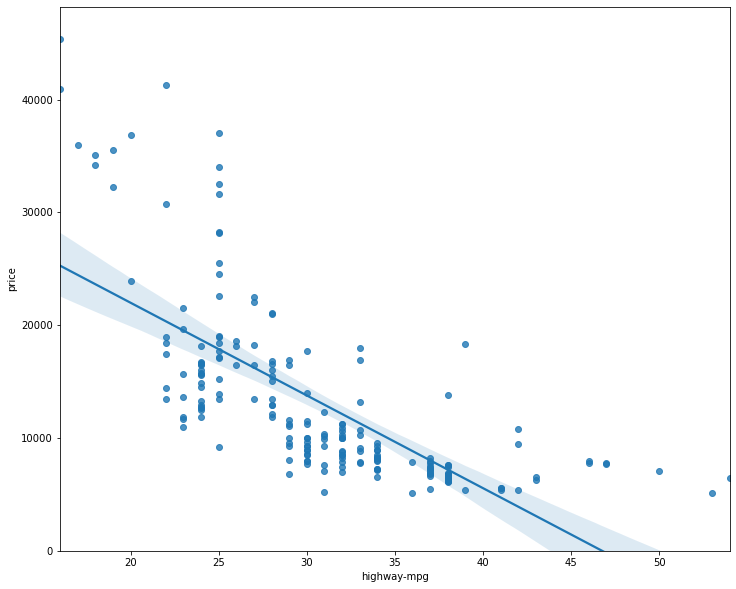

In [21]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data=car)
plt.ylim(0,)

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

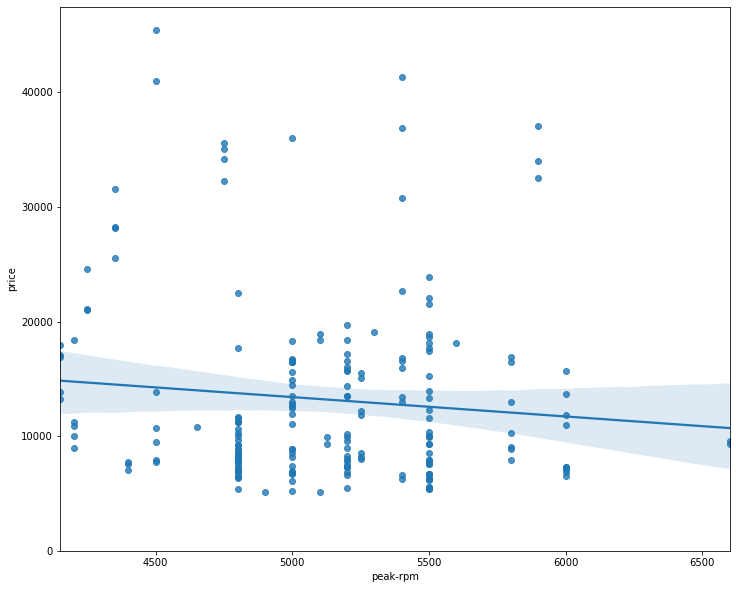

In [22]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=car)
plt.ylim(0,)

Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.

In [23]:
car[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


Residual Plot

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

(0.0, 22450.668458176668)

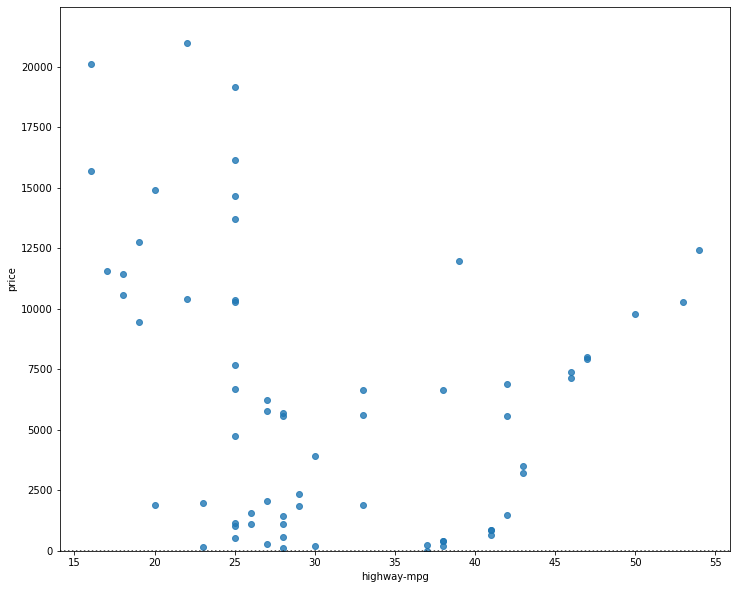

In [24]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x='highway-mpg',y='price',data=car)
plt.ylim(0,)

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

Multiple Linear Regression Plot

In [25]:
X = car[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = car['price']
lm.fit(X,Y)

LinearRegression()

In [26]:
Y_hat = lm.predict(X)

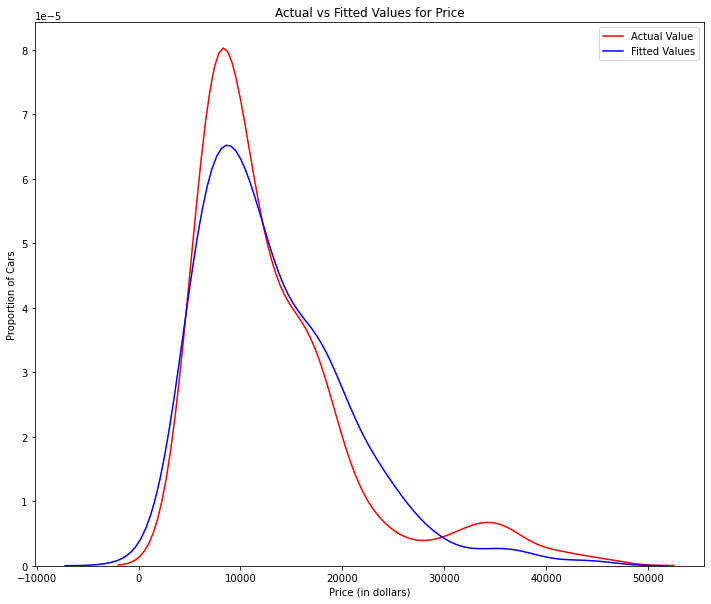

In [27]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(car['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Part 3: Polynomial Regression and Pipelines

Quadratic - 2nd order

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2
 
Cubic - 3rd order

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3

Higher order:

𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [28]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [29]:
x = car['highway-mpg']
y = car['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [30]:
## Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Plot the function p

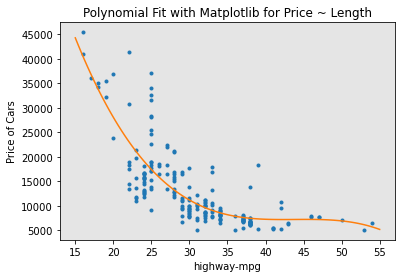

In [31]:
PlotPolly(p,x,y,'highway-mpg')

In [32]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Question #4:
Create 11 order polynomial model with the variables x and y from above?

In [33]:
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


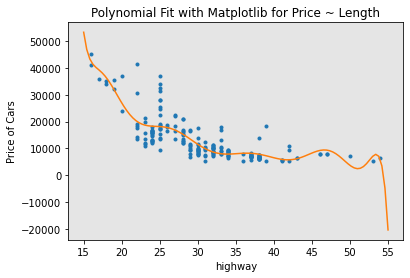

In [34]:
PlotPolly(p,x,y,'highway')

Multivariate Polynomial 

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22

We can perform a polynomial transform on multiple features. First, we import the module:

In [35]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [36]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [37]:
Z = car[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = car['price']
lm.fit(Z,Y)

LinearRegression()

In [38]:
Z_pr = pr.fit_transform(Z)

In [39]:
Z.shape

(201, 4)

In [40]:
Z_pr.shape

(201, 15)

In [41]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [43]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Part 4: Measures for In-Sample Evaluation

Model 1: Simple Linear Regression

In [49]:
Y = car['price']
X = car[['highway-mpg']]

In [50]:
lm.fit(X,Y)
print('The R suqared is:', lm.score(X,Y))

The R suqared is: 0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

In [51]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is:', Yhat[0:4])

The output of the first four predicted value is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mse = mean_squared_error(car['price'],Yhat)
print('The mean square error of price and predicted value is:', mse)

The mean square error of price and predicted value is: 31635042.944639895


Model 2: Multiple Linear Regression

In [54]:
lm.fit(Z,car['price'])
print('R squared is:', lm.score(Z,car['price']))

R squared is: 0.8093562806577457


In [55]:
Y_predict_multifit = lm.predict(Z) 

In [56]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(car['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [57]:
from sklearn.metrics import r2_score

In [58]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.702376908737018


In [60]:
mean_squared_error(car['price'], p(x))

18703127.67098826

Part 5: Prediction and Decision Making

In [61]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [62]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [63]:
lm.fit(X, Y)
lm

LinearRegression()

In [64]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

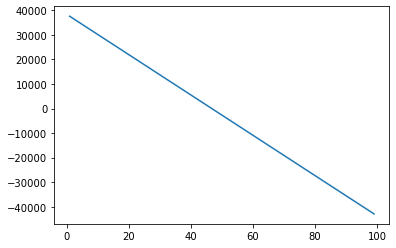

In [65]:
plt.plot(new_input, yhat)
plt.show()